# Sentimen Analysis Aplikasi Telegram

## Import Library

In [11]:
!pip install Sastrawi
!pip install wordcloud
!pip install tensorflow
!pip install nltk
!pip install gensim

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

import re

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

import csv
import requests
import string
from io import StringIO

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load Dataset

In [13]:
review_df = pd.read_csv('telegram-review.csv')
review_df.head(10)

,Unnamed: 0,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0,9d95e21b-cf1d-4c27-b7db-31df13d8569a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Versi sekarang cuma bisa chatting aja, biasany...",2,741,11.7.4,2025-03-04 14:25:09,We're sorry to hear that. Please verify that y...,2025-03-04 15:03:17,11.7.4
1,1,fc828663-e951-4509-b0da-c0a810a92bf0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bagusan settingan dulu, yg bisa layar ambang k...",2,273,11.7.4,2025-03-04 16:40:59,NaN,NaN,11.7.4
2,2,1a89aa6d-4c1e-49e2-8802-0b35f4521127,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Hampir semua fitur harus berlangganan ke premi...,1,1360,11.8.2,2025-03-14 22:22:27,NaN,NaN,11.8.2
3,3,970a0e27-163e-44b3-9b45-7fa338be7222,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini gimana mau login g bisa2! Kode g dikirim2 ...,1,1000,11.7.4,2025-03-06 17:21:18,NaN,NaN,11.7.4
4,4,371f7a0e-5311-4089-9671-328758442052,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Parah sejak update kenapa malah lelet terus, j...",1,323,11.7.4,2025-03-04 09:23:03,NaN,NaN,11.7.4
5,5,80a793fb-91bc-4a26-ba50-835b7a3cd28f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aneh kode Verifikasi ny gk muncul2 di SMS, leb...",1,369,11.8.2,2025-03-14 09:15:03,We're sorry to hear that. Please verify that y...,2025-03-13 16:01:37,11.8.2
6,6,5cce5eac-f448-41d8-90a6-063b33059536,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,apk morotin! Masa update an terbaru gabisa pas...,1,386,11.7.4,2025-03-04 12:26:09,NaN,NaN,11.7.4
7,7,008cd591-7b0b-49ee-aef4-494e3fcecc5c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Siang tadi pakai Tele lancar-lancar aja, eh so...",1,100,11.7.4,2025-03-09 17:06:51,NaN,NaN,11.7.4
8,8,6ee37cea-32e2-48b6-aea1-c2fd7bd94210,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Jelek, apa-apa premium, apa-apa premium. Kasia...",1,94,11.8.2,2025-03-16 19:06:58,NaN,NaN,11.8.2
9,9,81076801-ff8c-4219-9f99-0090e911c788,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,disuruh nunggu kode yg dikirim lewat sms ngga ...,1,165,11.8.2,2025-03-15 14:14:57,NaN,NaN,11.8.2


## Assessing and Cleaning Data

In [14]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63000 entries, 0 to 62999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            63000 non-null  int64 
 1   reviewId              63000 non-null  object
 2   userName              63000 non-null  object
 3   userImage             63000 non-null  object
 4   content               63000 non-null  object
 5   score                 63000 non-null  int64 
 6   thumbsUpCount         63000 non-null  int64 
 7   reviewCreatedVersion  44894 non-null  object
 8   at                    63000 non-null  object
 9   replyContent          6511 non-null   object
 10  repliedAt             6511 non-null   object
 11  appVersion            44894 non-null  object
dtypes: int64(3), object(9)
memory usage: 5.8+ MB


In [15]:
print("Jumlah dupllikat: ", review_df.duplicated().sum())

Jumlah dupllikat:  0


### Mengambil Kolom yang Dipakai Untuk Analisis

In [16]:
clean_df = review_df[['content', 'score']]

clean_df.head()

,content,score
0,"Versi sekarang cuma bisa chatting aja, biasany...",2
1,"Bagusan settingan dulu, yg bisa layar ambang k...",2
2,Hampir semua fitur harus berlangganan ke premi...,1
3,Ini gimana mau login g bisa2! Kode g dikirim2 ...,1
4,"Parah sejak update kenapa malah lelet terus, j...",1


In [17]:
stopwords.words('indonesian')

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [19]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text

def casefoldingText(text):
    result = text.lower()
    return result

slangwords = {"gw": "aku", "abis": "habis", "udh": "sudah",
              "masi": "masih", "udah": "sudah", "aja": "saja",
              "bgt": "banget", "maks": "maksimal", "trus":"terus",
              "bgus":"bagus", 'yg':'yang', 'apk':'aplikasi', 'tele':'telegram',
              "gk":"tidak", "gabisa":"tidak bisa", "nomer":"nomor","kalo":"kalau",
              "gua":"aku"
              }
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

def tokenizingText(text):
    result = word_tokenize(text)
    return result

NEGATORS = {"tidak","tak","bukan","enggak","gak","ga","nggak","kurang","ndak","ndak","ora","ngga","tdk","gk"}

def filteringText(text_token):
    listStopwords = set(stopwords.words('indonesian')) | set(stopwords.words('english'))
    listStopwords.update(["sih", "yah"])
    listStopwords = listStopwords - NEGATORS

    return [t for t in text_token if t not in listStopwords]

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [20]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

/tmp/ipython-input-1218265057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
/tmp/ipython-input-1218265057.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
/tmp/ipython-input-1218265057.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [21]:
clean_df.head()

,content,score,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,"Versi sekarang cuma bisa chatting aja, biasany...",2,Versi sekarang cuma bisa chatting aja biasanya...,versi sekarang cuma bisa chatting aja biasanya...,versi sekarang cuma bisa chatting saja biasany...,"[versi, sekarang, cuma, bisa, chatting, saja, ...","[versi, chatting, status, tidak, premium, logi...",versi chatting status tidak premium login kode...
1,"Bagusan settingan dulu, yg bisa layar ambang k...",2,Bagusan settingan dulu yg bisa layar ambang ke...,bagusan settingan dulu yg bisa layar ambang ke...,bagusan settingan dulu yang bisa layar ambang ...,"[bagusan, settingan, dulu, yang, bisa, layar, ...","[bagusan, settingan, layar, ambang, nonton, vi...",bagusan settingan layar ambang nonton video ba...
2,Hampir semua fitur harus berlangganan ke premi...,1,Hampir semua fitur harus berlangganan ke premi...,hampir semua fitur harus berlangganan ke premi...,hampir semua fitur harus berlangganan ke premi...,"[hampir, semua, fitur, harus, berlangganan, ke...","[fitur, berlangganan, premium, diupdate, otoma...",fitur berlangganan premium diupdate otomatis k...
3,Ini gimana mau login g bisa2! Kode g dikirim2 ...,1,Ini gimana mau login g bisa Kode g dikirim sam...,ini gimana mau login g bisa kode g dikirim sam...,ini gimana mau login g bisa kode g dikirim sam...,"[ini, gimana, mau, login, g, bisa, kode, g, di...","[gimana, login, g, kode, g, dikirim, mancing, ...",gimana login g kode g dikirim mancing emosi te...
4,"Parah sejak update kenapa malah lelet terus, j...",1,Parah sejak update kenapa malah lelet terus ja...,parah sejak update kenapa malah lelet terus ja...,parah sejak update kenapa malah lelet terus ja...,"[parah, sejak, update, kenapa, malah, lelet, t...","[parah, update, lelet, jaringan, bagus, loadin...",parah update lelet jaringan bagus loading kiri...


## Memberi Label pada Dataset

In [22]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [23]:
overlap = set(lexicon_positive).intersection(lexicon_negative)
print("Overlap size:", len(overlap))

for w in ["bagus","keren","mantap","baik", "menarik"]:
    if w in overlap:
        print(w, lexicon_positive.get(w), lexicon_negative.get(w))

NEG_REMOVE = {"bagus","keren","mantap","baik","hebat","top","baguss","menarik"}
for w in NEG_REMOVE:
    lexicon_negative.pop(w, None)

Overlap size: 1142
bagus 2 -4
baik 3 -1
menarik 4 -4


In [24]:
NEGATORS = {"tidak","tak","bukan","enggak","gak","ga","nggak","kurang","ndak","ora","tdk"}
INTENSIFIERS = {"sangat": 0.5, "banget": 0.5, "amat": 0.4, "terlalu": 0.4}  # multipliers
DAMPENERS    = {"agak": -0.3, "lumayan": -0.2}

def sentiment_analysis_lexicon_indonesia(tokens, window=3):
    score = 0.0
    for i, w in enumerate(tokens):
        pos = lexicon_positive.get(w, 0)
        neg = lexicon_negative.get(w, 0)
        v = pos + neg

        # look back for negator within window
        j0 = max(0, i - window)
        if any(t in NEGATORS for t in tokens[j0:i]):
            v = -v

        # simple intensifier/dampener on previous token
        if i > 0:
            prev = tokens[i-1]
            if prev in INTENSIFIERS: v *= (1 + INTENSIFIERS[prev])
            if prev in DAMPENERS:    v *= (1 + DAMPENERS[prev])

        score += v

    # simple threshold
    if score > 0:  polarity = "positive"
    elif score < 0: polarity = "negative"
    else: polarity = "neutral"
    return score, polarity


In [25]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
clean_df['polarity_score'], clean_df['polarity'] = zip(*results)

print(clean_df['polarity'].value_counts())

polarity
negative    37218
positive    20351
neutral      5431
Name: count, dtype: int64


/tmp/ipython-input-173017613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['polarity_score'], clean_df['polarity'] = zip(*results)
/tmp/ipython-input-173017613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['polarity_score'], clean_df['polarity'] = zip(*results)


In [26]:
clean_df[['text_stopword','text_akhir','polarity_score','polarity']].head()

,text_stopword,text_akhir,polarity_score,polarity
0,"[versi, chatting, status, tidak, premium, logi...",versi chatting status tidak premium login kode...,-11.0,negative
1,"[bagusan, settingan, layar, ambang, nonton, vi...",bagusan settingan layar ambang nonton video ba...,6.0,positive
2,"[fitur, berlangganan, premium, diupdate, otoma...",fitur berlangganan premium diupdate otomatis k...,-16.0,negative
3,"[gimana, login, g, kode, g, dikirim, mancing, ...",gimana login g kode g dikirim mancing emosi te...,-5.0,negative
4,"[parah, update, lelet, jaringan, bagus, loadin...",parah update lelet jaringan bagus loading kiri...,-12.5,negative


## Eksplorasi Hasil Label

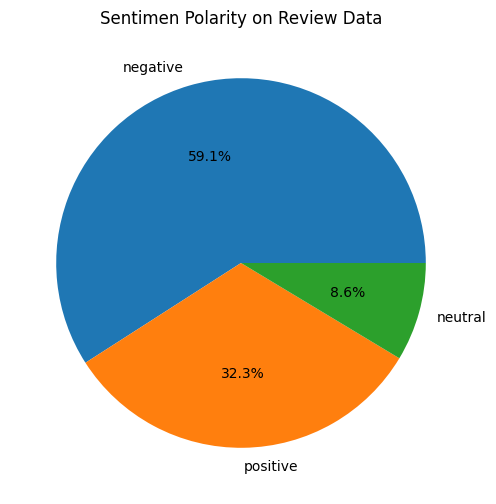

In [27]:
plt.figure(figsize=(8,6))
plt.pie(clean_df['polarity'].value_counts(), labels=clean_df['polarity'].value_counts().index, autopct='%1.1f%%')
plt.title("Sentimen Polarity on Review Data")
plt.show()

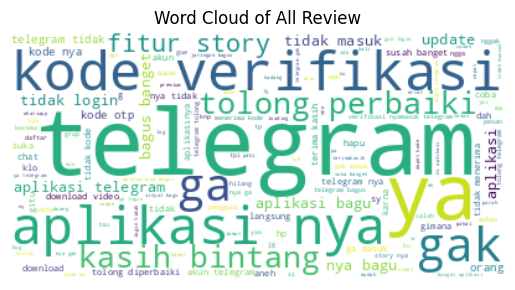

In [28]:
text = " ".join(review for review in clean_df['text_akhir'])
wordcloud = WordCloud(background_color="white").generate(text)

plt.title("Word Cloud of All Review")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

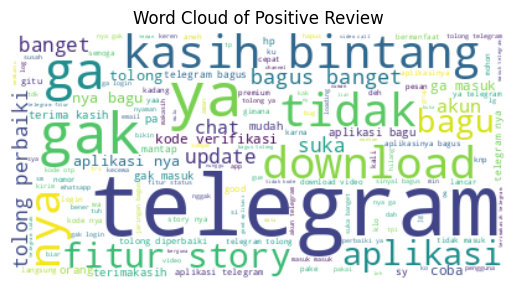

In [29]:
clean_df_positive = clean_df[clean_df["polarity"]=='positive']
text = " ".join(review for review in clean_df_positive['text_akhir'])
wordcloud = WordCloud(background_color="white").generate(text)

plt.title("Word Cloud of Positive Review")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

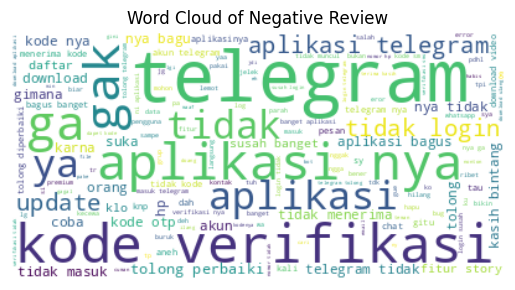

In [30]:
clean_df_negative = clean_df[clean_df["polarity"]=='negative']
text = " ".join(review for review in clean_df_negative['text_akhir'])
wordcloud = WordCloud(background_color="white").generate(text)

plt.title("Word Cloud of Negative Review")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

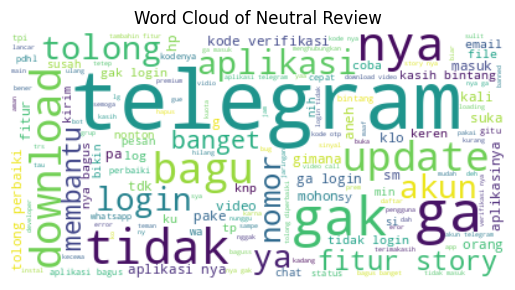

In [31]:
clean_df_neutral = clean_df[clean_df["polarity"]=='neutral']
text = " ".join(review for review in clean_df_neutral['text_akhir'])
wordcloud = WordCloud(background_color="white").generate(text)

plt.title("Word Cloud of Neutral Review")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Pelatihan Model

In [32]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

y = y.replace({'negative': 0, 'neutral': 1, 'positive': 2})

y = np.array(y, dtype=np.float64)

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X).toarray()

print(X_tfidf)

/tmp/ipython-input-1835561211.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'negative': 0, 'neutral': 1, 'positive': 2})


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf, columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,aktif,akun,aman,aneh,aplikasi,aplikasinya,app,bagus,banget,banned,...,unduh,update,verifikasi,video,vidio,wa,whatsapp,wifi,ya,yaa
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.234562,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.295407,0.000000,0.577463,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.101067,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.166966,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.275238,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.102543,0.114897,0.0,...,0.0,0.147447,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0.0,0.0,0.0,0.0,0.291300,0.0,0.0,0.000000,0.374189,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
62996,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.302250,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
62997,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
62998,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### Skema 1:
- Model: Random Forest
- Ekstraksi Fitur: TF-IDF
- Pembagian Data: 80/20

In [34]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train, y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9629563492063492
Random Forest - accuracy_test: 0.7422222222222222


### Skema 2:
- Model: Artificial Neural Network
- Ekstraksi Fitur: TF-IDF
- Pembagian Data: 80/20

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [37]:
ANN = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_tfidf.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(3, activation='softmax')
])

ANN.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

ANN.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6304 - loss: 0.8903 - val_accuracy: 0.7383 - val_loss: 0.6475
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7287 - loss: 0.6723 - val_accuracy: 0.7461 - val_loss: 0.6273
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7391 - loss: 0.6395 - val_accuracy: 0.7517 - val_loss: 0.6184
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7477 - loss: 0.6255 - val_accuracy: 0.7537 - val_loss: 0.6116
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7488 - loss: 0.6140 - val_accuracy: 0.7539 - val_loss: 0.6116
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7567 - loss: 0.6021 - val_accuracy: 0.7544 - val_loss: 0.6115
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7683 - loss: 0.5856 - val_accuracy: 0.7566 - val_loss: 0.6092
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.7677 - loss: 0.57

### Skema 3:
- Model: Long-Short Term Memory (LSTM)
- Ekstraksi Fitur: Word2Vec
- Pembagian Data: 80/20

In [38]:
word2vec_model = Word2Vec(sentences=clean_df['text_stopword'], vector_size=100, window=5, min_count=1, workers=4)

word_index = {}
index = 1
for sentence in clean_df['text_stopword']:
    for word in sentence:
        if word not in word_index:
            word_index[word] = index
            index += 1

sequences = [[word_index[word] for word in sentence if word in word_index] for sentence in clean_df['text_stopword']]

max_length = 200
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

vocab_size = len(word_index) + 1

embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

In [39]:
RNN = keras.Sequential([
    layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim,
              weights=[embedding_matrix], input_length=max_length, trainable=True),
    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(64)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    mode='max',
    min_delta=0.01,
    verbose=1,
    restore_best_weights=True
)
optimizer = Adam(learning_rate=0.001, decay=1e-6)
RNN.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

RNN.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


788/788 ━━━━━━━━━━━━━━━━━━━━ 47s 49ms/step - accuracy: 0.6909 - loss: 0.7318 - val_accuracy: 0.8366 - val_loss: 0.4295
Epoch 2/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 76s 46ms/step - accuracy: 0.8698 - loss: 0.3590 - val_accuracy: 0.8925 - val_loss: 0.2856
Epoch 3/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.9294 - loss: 0.1858 - val_accuracy: 0.9021 - val_loss: 0.2686
Epoch 4/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.9525 - loss: 0.1235 - val_accuracy: 0.8990 - val_loss: 0.3093
Epoch 5/10
788/788 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9655 - loss: 0.0910 - val_accuracy: 0.8940 - val_loss: 0.3399
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


In [40]:
RNN.save("rnn_model.h5")

# Prediksi Kalimat Baru

In [41]:
def preprocess_to_tokens_inference(text: str):
    t = cleaningText(text)
    t = casefoldingText(t)
    t = fix_slangwords(t)
    tokens = tokenizingText(t)
    tokens = filteringText(tokens)
    return tokens

def text_to_padded_sequence_inference(text: str, word_index: dict, max_length: int = 200):
    tokens = preprocess_to_tokens_inference(text)
    seq = [word_index.get(token, 0) for token in tokens]
    X = pad_sequences([seq], maxlen=max_length, padding='post', truncating='post')
    return X, tokens

def predict_sentence(text: str, model, word_index: dict, max_length: int = 200, class_names=None):
    X_new, tokens = text_to_padded_sequence_inference(text, word_index, max_length)
    probs = model.predict(X_new, verbose=0)[0]
    pred_idx = int(np.argmax(probs))
    label = class_names[pred_idx] if class_names else pred_idx
    return {"text": text, "tokens": tokens, "pred_idx": pred_idx, "label": label, "probs": probs}

class_names = ["negative", "neutral", "positive"]

examples = [
    "Aplikasinya jelek dan sering error.",
    "Biasa saja sih, ada bagusnya ada jeleknya.",
    "Aplikasinya keren banget, super membantu!"
]

for s in examples:
    out = predict_sentence(s, RNN, word_index, max_length=200, class_names=class_names)
    print(f"\nText: {out['text']}")
    print(f"Tokens: {out['tokens']}")
    print(f"Predicted: {out['label']}  (idx={out['pred_idx']})")
    print(f"Probabilities: {out['probs']}")



Text: Aplikasinya jelek dan sering error.
Tokens: ['aplikasinya', 'jelek', 'error']
Predicted: negative  (idx=0)
Probabilities: [9.9974221e-01 1.9367000e-04 6.4082786e-05]

Text: Biasa saja sih, ada bagusnya ada jeleknya.
Tokens: ['bagusnya', 'jeleknya']
Predicted: neutral  (idx=1)
Probabilities: [0.00983189 0.726643   0.26352504]

Text: Aplikasinya keren banget, super membantu!
Tokens: ['aplikasinya', 'keren', 'banget', 'super', 'membantu']
Predicted: positive  (idx=2)
Probabilities: [0.01173287 0.06324068 0.9250265 ]


In [42]:
import json
import pickle

with open("word_index.json", "w", encoding="utf-8") as f:
    json.dump(word_index, f, ensure_ascii=False)

meta = {
    "max_length": max_length,
    "class_names": class_names
}
with open("meta.pkl", "wb") as f:
    pickle.dump(meta, f)

print("✅ word_index.json and meta.pkl saved.")


✅ word_index.json and meta.pkl saved.
